In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def linear(x):
    return 3.1*(x-1) + 2

def sin(x):
    return 2*np.sin(x - 1) + 1

def pdfLike(x):
    return (10**(-3*x) + (1-10**x)**5 - 1)*6

def secondPdfLike(x):
    term1 = (-2**x * 5**(1 + x) * (1 - 10**x)**4 * np.log(2) * np.log(10))
    term2 = (2**x * 5**(1 + x) * (1 - 10**x)**4 * np.log(5) * np.log(10))
    term3 = (9 * 10**(-3*x) * np.log(10)**2)
    term4 = (2**(2 + 2*x) * 5**(1 + 2*x) * (1 - 10**x)**3 * np.log(10)**2)
    
    return 6*(term1 - term2 + term3 + term4)

def interpLinear(x,y):
    y0 = y[0]
    x0 = x[0]
    m = (y[2] - y[1])/(x[2] - x[1])
    return m,x0,y0

def linearModel(x,m,x0,y0):
    return m*(x-x0) + y0

In [4]:
def interpPowerLaw(x,y):
    # Well behaved PDFs are always monotonically increasing/decreasing at the boundaries
    # i.e this will never be used exactly at a turning point
    # Currently negatives do not work, fix this 
    if y[0] > 0 and y[1] > 0 and x[0] > 0 and x[1] > 0:
        y1 = np.log(y[0])
        x1 = np.log(x[0])
        y2 = np.log(y[1])
        x2 = np.log(x[1])
        
        b = (y2 - y1)/(x2 - x1)
        a = np.exp(y2 - b*x1)
        
        return a,b
    elif y[0] < 0 and y[1] < 0 and x[0] > 0 and x[1] > 0:
        y1 = np.log(-y[0])
        x1 = np.log(x[0])
        y2 = np.log(-y[1])
        x2 = np.log(x[1])
        
        b = (y2 - y1)/(x2 - x1)
        a = -np.exp(y2 - b*x1)
        
        return a,b
    elif y[0] < 0 and y[1] < 0 and x[0] < 0 and x[1] < 0:
        y1 = np.log(-y[0])
        x1 = np.log(-x[0])
        y2 = np.log(-y[1])
        x2 = np.log(-x[1])
        
        b = (y2 - y1)/(x2 - x1)
        a = -np.exp(y2 - b*x1)
        
        return a,b
    elif y[0] > 0 and y[1] > 0 and x[0] < 0 and x[1] < 0:
        y1 = np.log(y[0])
        x1 = np.log(-x[0])
        y2 = np.log(y[1])
        x2 = np.log(-x[1])
        
        b = (y2 - y1)/(x2 - x1)
        a = np.exp(y2 - b*x1)
        
        return a,b
    else:
        return 0,0
def powerLaw(x,a,b):
    if x>0:
        return a*x**b
    elif x<0:
        return a*(-x)**b
    else:
        return 0
def secondPowerLaw(x,a,b):
    if x>0:
        return a*b*(b-1)*x**(b-2)
    elif x<0:
        return a*b*(b-1)*(-x)**(b-2)
    else:
        return 0

-6077716241922503.0 -4.423192307692307 111616441762242.62
Error: 39.711835%


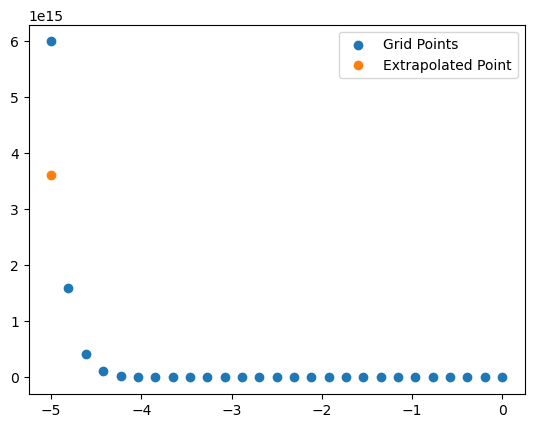

In [5]:
test_x = np.linspace(-5,-0.001,27)
test_y = pdfLike(test_x)


m,x0,y0 = interpLinear(test_x[::-1][-4:-1],test_y[::-1][-4:-1])
print(m,x0,y0)
y = linearModel(test_x[0],m,x0,y0)
print("Error: {:.6f}%".format(100*(test_y[0] - y)/test_y[0]))

plt.figure()
plt.scatter(test_x,test_y, label="Grid Points")
plt.scatter(test_x[0],y, label="Extrapolated Point")
plt.legend()
plt.show()

-330.99004983836846 -0.5778076923076929 320.06147933452826
Error: 99.967796%


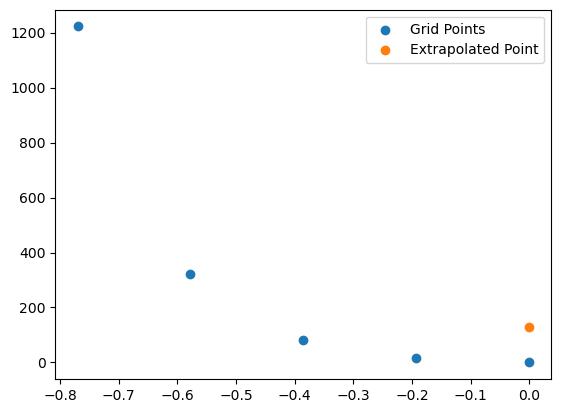

In [6]:
test_x = np.linspace(-5,-0.001,27)
test_y = pdfLike(test_x)


m,x0,y0 = interpLinear(test_x[-4:-1],test_y[-4:-1])
print(m,x0,y0)
y = linearModel(test_x[-1],m,x0,y0)
print("Error: {:.6f}%".format(100*(y - test_y[-1])/y))

plt.figure()
plt.scatter(test_x[-5:],test_y[-5:], label="Grid Points")
plt.scatter(test_x[-1],y, label="Extrapolated Point")
plt.legend()
plt.show()

Error: -154.656811%


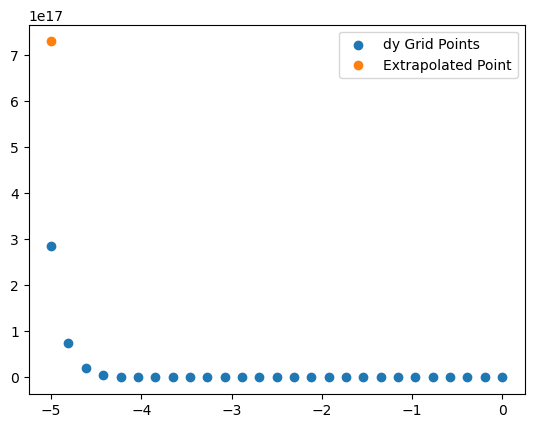

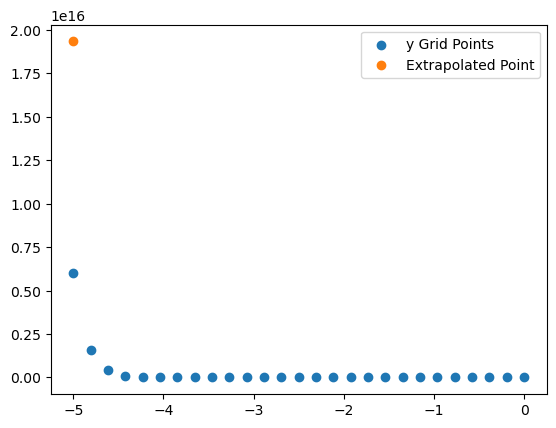

In [7]:
test_x = np.linspace(-5,-0.001,27)
test_y = pdfLike(test_x)
test_dy = secondPdfLike(test_x)

a,b = interpPowerLaw([test_x[3],test_x[2],test_x[1]],[test_y[3],test_y[2],test_y[1]])

dy = secondPowerLaw(test_x[0],a,b)
y = powerLaw(test_x[0],a,b)
print("Error: {:.6f}%".format(100*(test_dy[0] - dy)/test_dy[0]))

plt.figure()
plt.scatter(test_x,test_dy, label="dy Grid Points")
plt.scatter(test_x[0],dy, label="Extrapolated Point")
plt.legend()
plt.show()

plt.figure()
plt.scatter(test_x,test_y, label="y Grid Points")
plt.scatter(test_x[0],y, label="Extrapolated Point")
plt.legend()
plt.show()

0.00011574739621759292 0.041590013111211466
Second Derivative Error: 7.820101%


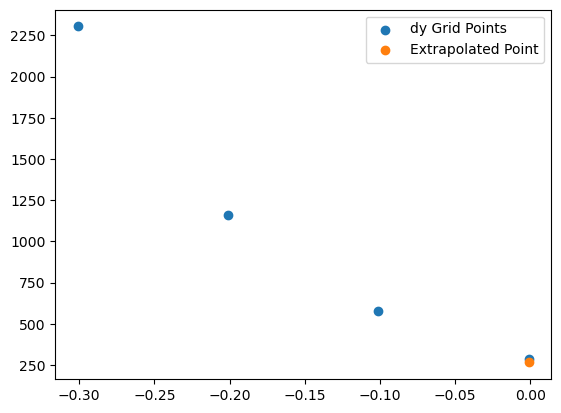

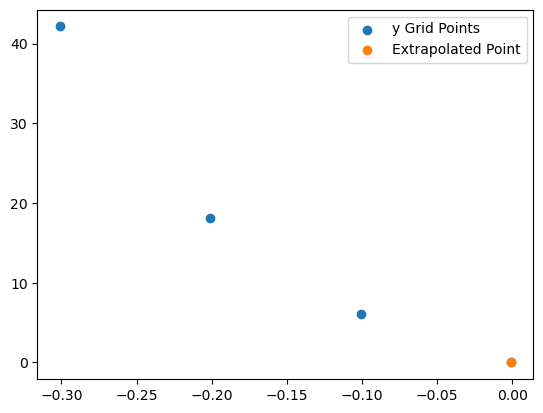

In [12]:
test_x = np.linspace(-5,-0.001,51)
test_y = pdfLike(test_x)
test_dy = secondPdfLike(test_x)

a,b = interpPowerLaw(test_x[-4:-1],test_y[-4:-1])

y = powerLaw(test_x[-1],a,b)
dy = secondPowerLaw(test_x[-1],a,b)
print(y, test_y[-1])
print("Second Derivative Error: {:.6f}%".format(100*(test_dy[-1] - dy)/test_dy[-1]))

plt.figure()
plt.scatter(test_x[-4:],test_dy[-4:], label="dy Grid Points")
plt.scatter(test_x[-1],dy, label="Extrapolated Point")
plt.legend()
plt.show()

plt.figure()
plt.scatter(test_x[-4:],test_y[-4:], label="y Grid Points")
plt.scatter(test_x[-1],y, label="Extrapolated Point")
plt.legend()
plt.show()

In [ ]:
test_x = np.linspace(-5,-0.001,51)
test_y = pdfLike(test_x)
test_dy = line(test_x)

a,b = interpPowerLaw(test_x[-4:-1],test_y[-4:-1])

y = powerLaw(test_x[-1],a,b)
dy = secondPowerLaw(test_x[-1],a,b)
print(y, test_y[-1])
print("Second Derivative Error: {:.6f}%".format(100*(test_dy[-1] - dy)/test_dy[-1]))

plt.figure()
plt.scatter(test_x[-4:],test_dy[-4:], label="dy Grid Points")
plt.scatter(test_x[-1],dy, label="Extrapolated Point")
plt.legend()
plt.show()

plt.figure()
plt.scatter(test_x[-4:],test_y[-4:], label="y Grid Points")
plt.scatter(test_x[-1],y, label="Extrapolated Point")
plt.legend()
plt.show()

In [9]:
def interpTenPowerLaw(x,y):
    y1 = np.log10(y[1])
    x1 = x[1]
    y2 =np.log10(y[2])
    x2 = x[2]
    # Well behaved PDFs are always monotonically increasing/decreasing at the boundaries
    # i.e this will never be used exactly at a turning point
    # Currently negatives do not work, fix this 
    b = (y2 - y1)/(x2 - x1)
    a = 10**(y2 - b*x2)
    return a,b
        

def tenPowerLaw(x,a,b):
    return a*10**(b*x)

def secondTenPowerLaw(x,a,b):
    return (np.log(10)*b)**2 * a * 10**(b*x)

Second Derivative Error: 0.000000%


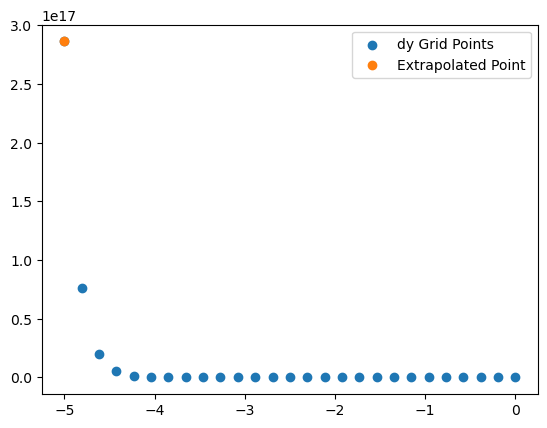

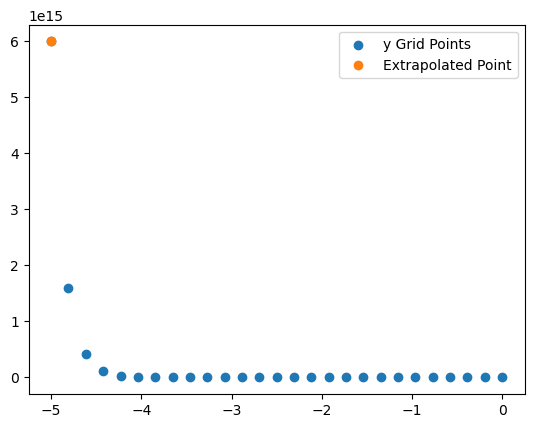

In [10]:
test_x = np.linspace(-5,-0.001,27)
test_y = pdfLike(test_x)
test_dy = secondPdfLike(test_x)

a,b = interpTenPowerLaw([test_x[3],test_x[2],test_x[1]],[test_y[3],test_y[2],test_y[1]])

dy = secondTenPowerLaw(test_x[0],a,b)
y = tenPowerLaw(test_x[0],a,b)
print("Second Derivative Error: {:.6f}%".format(100*(dy - test_dy[0])/dy))

plt.figure()
plt.scatter(test_x,test_dy, label="dy Grid Points")
plt.scatter(test_x[0],dy, label="Extrapolated Point")
plt.legend()
plt.show()

plt.figure()
plt.scatter(test_x,test_y, label="y Grid Points")
plt.scatter(test_x[0],y, label="Extrapolated Point")
plt.legend()
plt.show()

2nd Derivative Error: 19.107924%


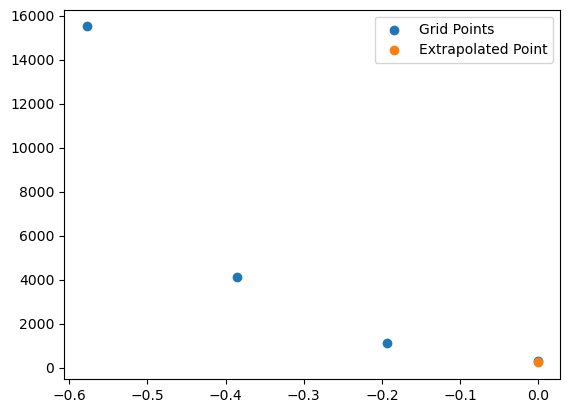

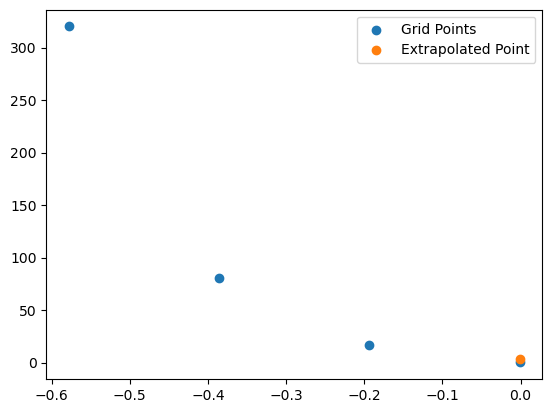

In [11]:
test_x = np.linspace(-5,-0.001,27)
test_y = pdfLike(test_x)
test_dy = secondPdfLike(test_x)

a,b = interpTenPowerLaw(test_x[-4:-1],test_y[-4:-1])

y = tenPowerLaw(test_x[-1],a,b)
dy = secondTenPowerLaw(test_x[-1],a,b)
print("2nd Derivative Error: {:.6f}%".format(100*(test_dy[-1] - dy)/test_dy[-1]))

plt.figure()
plt.scatter(test_x[-4:],test_dy[-4:], label="Grid Points")
plt.scatter(test_x[-1],dy, label="Extrapolated Point")
plt.legend()
plt.show()

plt.figure()
plt.scatter(test_x[-4:],test_y[-4:], label="Grid Points")
plt.scatter(test_x[-1],y, label="Extrapolated Point")
plt.legend()
plt.show()